#Import libraries

In [1]:
!pip install regex requests hydra-core omegaconf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=d761d5f289f50fcd32d3cc70807877eb1835e669a86e06d92eabff636a31c7c5
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime


In [2]:
!pip install -q datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.


In [3]:
import torch
import pandas as pd
from datasets import load_dataset
from transformers import RobertaModel, RobertaTokenizer
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Tải dữ liệu và bộ từ điển từ NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [4]:
# !pip install textattack

In [5]:
# !pip install --upgrade urllib3
# !pip install --upgrade requests
# !pip install --upgrade cryptography pyOpenSSL

#Loading data

In [ ]:
# import pandas as pd

# # Đọc tệp outputTweets
# data = pd.read_csv("new_outputTweets.csv")
# data

,label,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


#Data Preprocessing

In [ ]:
# def dataPreprocessing(df):
#     # Xóa các từ bắt đầu bằng @
#     df['clean_text'] = df['text'].str.replace(r'@[A-Za-z0-9_]+\s+', '', regex=True)

#     # removing everything except alphabets
#     df['clean_text'] = df['clean_text'].str.replace(r"[^a-zA-Z]", " ", regex=True)

#     # make all text lowercase
#     df['clean_text'] = df['clean_text'].apply(lambda x: x.lower())

#     # tokenization
#     tokenized_doc = df['clean_text'].apply(lambda x: x.split())

#     # remove stop-words
#     tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
#     df['tokenized'] = tokenized_doc

#     # Lematization
#     lemmatizer = WordNetLemmatizer() # Khởi tạo lemmatizer
#     lemmatized_texts = df['tokenized'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])
#     df['tokenized'] = lemmatized_texts

#     # de-tokenization
#     df['clean_text'] = df['tokenized'].apply(lambda tokens: ' '.join(tokens))

#     # Loại bỏ các dòng có độ dài clean_text lớn hơn 512 và nhỏ hơn 2
#     df = df[(df['clean_text'].apply(lambda x: len(x.split())) <= 512) & (df['clean_text'].apply(lambda x: len(x.split())) >= 2)]

#     return df

In [ ]:
# processed_data = dataPreprocessing(data)
# processed_data

,label,text,clean_text,tokenized
1,positive,@VirginAmerica plus you've added commercials t...,plus added commercial experience tacky,"[plus, added, commercial, experience, tacky]"
2,neutral,@VirginAmerica I didn't today... Must mean I n...,today must mean need take another trip,"[today, must, mean, need, take, another, trip]"
3,negative,@VirginAmerica it's really aggressive to blast...,really aggressive blast obnoxious entertainmen...,"[really, aggressive, blast, obnoxious, enterta..."
4,negative,@VirginAmerica and it's a really big bad thing...,really big bad thing,"[really, big, bad, thing]"
5,negative,@VirginAmerica seriously would pay $30 a fligh...,seriously would pay flight seat playing really...,"[seriously, would, pay, flight, seat, playing,..."
...,...,...,...,...
14635,positive,@AmericanAir thank you we got on a different f...,thank got different flight chicago,"[thank, got, different, flight, chicago]"
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...,leaving minute late flight warning communicati...,"[leaving, minute, late, flight, warning, commu..."
14637,neutral,@AmericanAir Please bring American Airlines to...,please bring american airline blackberry,"[please, bring, american, airline, blackberry]"
14638,negative,"@AmericanAir you have my money, you change my ...",money change flight answer phone suggestion ma...,"[money, change, flight, answer, phone, suggest..."


#Data Visualization

In [ ]:
# label_counts = processed_data['label'].value_counts()
# print(label_counts)

label
negative    9091
neutral     2921
positive    2197
Name: count, dtype: int64


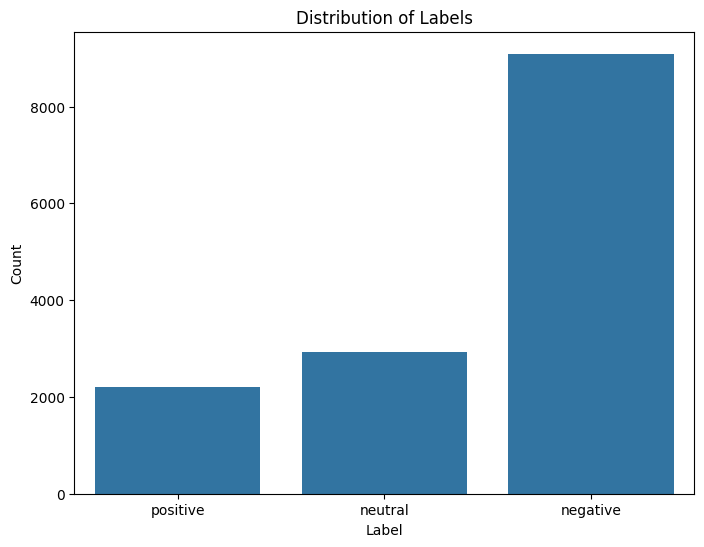

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# def dataVisualization(df):
#     plt.figure(figsize=(8, 6))
#     sns.countplot(x="label", data=df)
#     plt.title("Distribution of Labels")
#     plt.xlabel("Label")
#     plt.ylabel("Count")
#     labels = df.label.unique()  # Get unique labels from the DataFrame
#     plt.xticks(ticks=range(len(labels)), labels=labels)  # Set tick labels
#     plt.show()

# # Call the function with train_df
# dataVisualization(processed_data)


# Data Augmentation

In [ ]:
# from textattack.augmentation import EasyDataAugmenter
# import pandas as pd

# def augmentation(df, text_col, label_col):
#     eda_augmenter_pos = EasyDataAugmenter(transformations_per_example=3)
#     eda_augmenter_neu = EasyDataAugmenter(transformations_per_example=2)

#     augmented_texts = []
#     augmented_labels = []

#     for text, label in zip(df[text_col], df[label_col]):
#         # Chỉ augment nếu nhãn là 'positive' hoặc 'neutral'
#         if label in 'positive':
#             augmented_sentences = eda_augmenter_pos.augment(text)

#             augmented_texts.append(text)
#             augmented_texts.extend(augmented_sentences)

#             augmented_labels.append(label)
#             augmented_labels.extend([label] * len(augmented_sentences))
#         elif label in 'neutral':
#             augmented_sentences = eda_augmenter_neu.augment(text)

#             augmented_texts.append(text)
#             augmented_texts.extend(augmented_sentences)

#             augmented_labels.append(label)
#             augmented_labels.extend([label] * len(augmented_sentences))
#         else:
#             augmented_texts.append(text)
#             augmented_labels.append(label)

#     augmented_df = pd.DataFrame({
#         text_col: augmented_texts,
#         label_col: augmented_labels
#     })

#     return augmented_df

# augmented_data = augmentation(processed_data, 'clean_text', 'label')

# print(augmented_data)


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


                                              clean_text     label
0                 plus added commercial experience tacky  positive
1             positive added commercial experience tacky  positive
2      meretricious plus added commercial experience ...  positive
3                 plus commercial added experience tacky  positive
4                 today must mean need take another trip   neutral
...                                                  ...       ...
26636           please bring american blackberry airline   neutral
26637  money change flight answer phone suggestion ma...  negative
26638  ppl need know many seat next flight plz put u ...   neutral
26639  ppl need know standby seat next flight plz put...   neutral
26640  ppl need know many seat next flight plz put u ...   neutral

[26641 rows x 2 columns]


In [ ]:
# label_counts = augmented_data['label'].value_counts()
# print(label_counts)

label
negative    9091
positive    8787
neutral     8763
Name: count, dtype: int64


In [ ]:
# augmented_data.to_csv('augmented_data.csv', index=False)

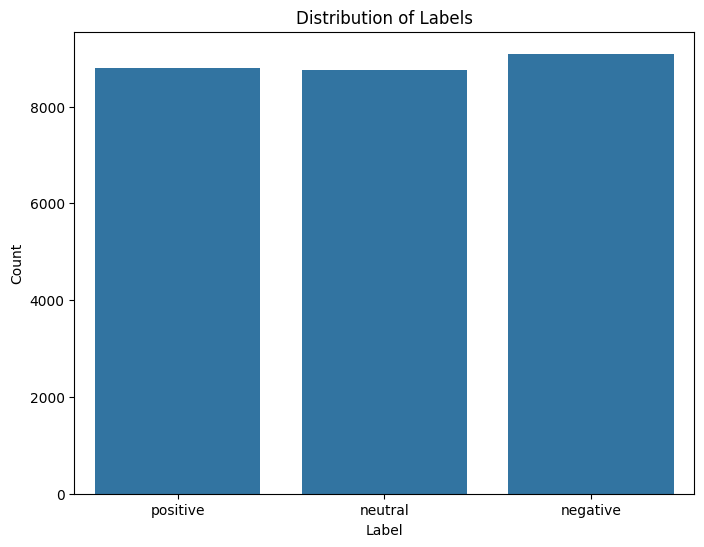

In [ ]:
# dataVisualization(augmented_data)

#Split data

In [ ]:
# import pandas as pd

# # Đọc tệp outputTweets
# augmented_data = pd.read_csv("augmented_data.csv")
# augmented_data

,clean_text,label
0,plus added commercial experience tacky,positive
1,positive added commercial experience tacky,positive
2,meretricious plus added commercial experience ...,positive
3,plus commercial added experience tacky,positive
4,today must mean need take another trip,neutral
...,...,...
26636,please bring american blackberry airline,neutral
26637,money change flight answer phone suggestion ma...,negative
26638,ppl need know many seat next flight plz put u ...,neutral
26639,ppl need know standby seat next flight plz put...,neutral


In [ ]:
# from sklearn.model_selection import train_test_split

# def split_train_val_test(data, labels, test_size=0.2, val_size=0.2, random_state=42):
#     # Chia tập dữ liệu thành tập huấn luyện và tập còn lại
#     X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=(test_size + val_size), random_state=random_state)

#     # Chia tập còn lại thành tập validation và tập kiểm tra
#     X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(val_size / (test_size + val_size)), random_state=random_state)

#     return X_train, X_val, X_test, y_train, y_val, y_test

# # Sử dụng hàm để chia tập dữ liệu
# X_train, X_val, X_test, y_train, y_val, y_test = split_train_val_test(augmented_data['clean_text'], augmented_data['label'], test_size=0.2, val_size=0.2, random_state=42)


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd

# Đọc file CSV
df_train = pd.read_csv('/content/drive/MyDrive/Text mining/train.csv')

# Lấy cột text và label
X_train = df_train['text']
y_train = df_train['label']

# In ra để kiểm tra
print(X_train.head())
print(y_train.head())

0                                       follow proceed
1                something wrong website safari iphone
2                               ok information dm info
3    ceo say southwest amp jetblue strayed low cost...
4    received error online hold hour completely una...
Name: text, dtype: object
0     neutral
1    negative
2     neutral
3     neutral
4    negative
Name: label, dtype: object


In [8]:
df_valid = pd.read_csv('/content/drive/MyDrive/Text mining/valid.csv')

# Lấy cột text và label
X_val = df_valid['text']
y_val = df_valid['label']

In [9]:
df_test = pd.read_csv('/content/drive/MyDrive/Text mining/test.csv')

# Lấy cột text và label
X_test = df_test['text']
y_test = df_test['label']

#Layer

##RoBERTa + LSTM

In [10]:
import torch
import torch.nn as nn
from transformers import RobertaTokenizer, RobertaModel

class RoBERTa_LSTM(nn.Module):
    def __init__(self, tokenizer, model, hidden_size, num_layers, num_classes):
        super(RoBERTa_LSTM, self).__init__()

        # Load pre-trained RoBERTa model and tokenizer
        self.tokenizer = tokenizer
        self.roberta = model

        # LSTM layer
        self.lstm = nn.LSTM(input_size=self.roberta.config.hidden_size,
                            hidden_size=hidden_size,
                            num_layers=num_layers,
                            batch_first=True,
                            bidirectional=True)

        # Dropout layer
        self.dropout = nn.Dropout(p=0.5)

        # Dense layers
        self.fc1 = nn.Linear(hidden_size * 2, 256)  # hidden_size * 2 for bidirectional LSTM
        self.fc2 = nn.Linear(256, num_classes)

        # Activation function
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, input_texts):
        # Tokenize input texts
        inputs = self.tokenizer(input_texts, return_tensors="pt", max_length=512, truncation=True, padding="max_length")
        input_ids = inputs["input_ids"].to(self.roberta.device)
        attention_mask = inputs["attention_mask"].to(self.roberta.device)

        # Get RoBERTa hidden states
        with torch.no_grad():
            outputs = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
            hidden_states = outputs.last_hidden_state  # shape: [batch_size, sequence_length, hidden_size]

        # LSTM layer
        h0 = torch.zeros(self.lstm.num_layers * 2, hidden_states.size(0), self.lstm.hidden_size).to(hidden_states.device)  # Initial hidden state for bidirectional LSTM
        c0 = torch.zeros(self.lstm.num_layers * 2, hidden_states.size(0), self.lstm.hidden_size).to(hidden_states.device)  # Initial cell state for bidirectional LSTM

        lstm_out, _ = self.lstm(hidden_states, (h0, c0))  # shape: [batch_size, sequence_length, hidden_size * 2]

        # Use the output of the last time step for each sequence in the batch
        lstm_out = lstm_out[:, -1, :]  # shape: [batch_size, hidden_size * 2]

        # Dropout layer
        dropout_out = self.dropout(lstm_out)

        # Fully connected layers
        fc1_out = self.relu(self.fc1(dropout_out))  # shape: [batch_size, 256]
        logits = self.fc2(fc1_out)  # shape: [batch_size, num_classes]

        # Apply softmax activation to get the probability distribution
        output = self.softmax(logits)

        return output

# Load pre-trained RoBERTa base model and tokenizer
model_name = "roberta-base"
tokenizer_RoBERTa = RobertaTokenizer.from_pretrained(model_name)
model_RoBERTa = RobertaModel.from_pretrained(model_name)

# Instantiate the model
model = RoBERTa_LSTM(tokenizer_RoBERTa, model_RoBERTa, hidden_size=256, num_layers=1, num_classes=3)

# Chuyển mô hình vào GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Dummy input: a list of 16 sentences
input_texts = ["This is sentence number " + str(i) for i in range(16)]
output = model(input_texts)

print(output.shape)  # Sẽ in ra torch.Size([16, num_classes])


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


torch.Size([16, 3])


# Dataset

In [11]:
import torch
from torch.utils.data import Dataset
from tqdm import tqdm

class TextDataset(Dataset):
    def __init__(self, texts, labels, transform=None):
        """
        texts: List of text samples
        labels: List of labels corresponding to the text samples
        transform: Optional transform to be applied on a sample
        """
        # Loại bỏ các câu có độ dài lớn hơn 512
        filtered_texts = []
        filtered_labels = []
        for text, label in zip(texts, labels):
            if len(text.split()) <= 512:  # Kiểm tra độ dài của câu
                filtered_texts.append(text)
                filtered_labels.append(label)

        self.texts = filtered_texts
        self.labels = filtered_labels
        self.transform = transform

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        # Mã hóa one-hot cho nhãn
        label_one_hot = torch.zeros(3)
        label_index = 0 if label == 'negative' else (1 if label == 'neutral' else 2)
        label_one_hot[label_index] = 1

        return text, label_one_hot
def collate_fn(batch):
    texts, labels = zip(*batch)
    # Convert labels to tensors
    labels = torch.stack([label for label in labels])
    return list(texts), labels

In [12]:
train_texts = X_train.tolist()
train_labels = y_train.tolist()

valid_texts = X_val.tolist()
valid_labels = y_val.tolist()

test_texts = X_test.tolist()
test_labels = y_test.tolist()

In [13]:
train_dataset = TextDataset(train_texts, train_labels)
valid_dataset = TextDataset(valid_texts, valid_labels)
test_dataset = TextDataset(test_texts, test_labels)

In [14]:
print(f'Training dataset size: {len(train_dataset)}')
print(f'Validation dataset size: {len(valid_dataset)}')
print(f'Test dataset size: {len(test_dataset)}')

Training dataset size: 15984
Validation dataset size: 5328
Test dataset size: 5329


In [15]:
from torch.utils.data import DataLoader
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, collate_fn=collate_fn)
valid_loader = DataLoader(valid_dataset, batch_size=16, shuffle=False, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, collate_fn=collate_fn)

In [16]:
batch_text, batch_label = next(iter(train_loader))
print(batch_text)
print(batch_label)

['adolfo ', 'oh see thanks underpin padresst', 'able get moon flight hotel puerto rico thank', 'delight yes please companionpass', 'helpful employee changed boarding zone would space pump disciplined fail', 'virtuoso mellani b whole team columbia sc absolute superstar incredibly helpful', 'pretty sure saying ricoh great service bos happytohelp', 'think need proof', 'pushing hour hold priceless http co th ldy', 'word ', 'qualification yes thanks much united see spoke reservation team reinstated flight thanks ey', 'booked ewr fll two let see compare garbage first class become', 'hold gt minute cancelled flightled flight still talked anyone flight soon give', 'international get message way flight gate ewr road condition horrible trying get flight', 'ktn reservation', 'received e mail either Es inbox junk spam']
tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
    

#Model

## Training model

In [17]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import time

def Train_model(model, loss_fn, optimizer, train_loader, val_loader, num_epochs=10):

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print("Training device: ", device)

    # Chuyển model vào thiết bị hỗ trợ huấn luyện
    model.to(device)
    start_time = time.time()

    for epoch in range(num_epochs):
        print(f'=== EPOCH {epoch+1}/{num_epochs} ===')

        model.train()
        running_loss = 0.0

        # Duyệt từng batch
        progress_bar = tqdm(enumerate(train_loader), total=len(train_loader))
        for i, (batch_input, batch_label) in progress_bar:
            optimizer.zero_grad() # xoá giá trị gradient cũ
            outputs = model(batch_input)
            batch_label = batch_label.squeeze()
            batch_label = batch_label.to(device)
            # print(f"train: batch_label: {batch_label}, output: {output}", )

            loss = loss_fn(outputs, batch_label)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * len(batch_input)

        epoch_loss = running_loss / len(train_loader.dataset)

        # PHA kiểm nghiệm (validation)
        # --> đưa dữ liệu qua tập validation
        model.eval()   # # Đặt chế độ model là eval
        val_loss = 0.0
        val_preds, val_targets = [], []
        with torch.no_grad():
            progress_bar = tqdm(enumerate(val_loader), total=len(val_loader))
            for i, (batch_input, batch_label) in progress_bar:
                batch_label = batch_label.squeeze()
                batch_label = batch_label.to(device)

                outputs = model(batch_input)
                # print(f"val: batch_label: {batch_label}, output: {output}", )
                loss = loss_fn(outputs, batch_label)
                val_loss += loss.item() * len(batch_input)

                _, predictions = torch.max(outputs, 1)
                groung_truth = torch.argmax(batch_label, dim=1)

                val_preds.extend(predictions.cpu().numpy())
                val_targets.extend(groung_truth.cpu().numpy())

        val_loss = val_loss / len(val_loader.dataset)
        val_acc = accuracy_score(val_targets, val_preds)

        print(f'+ Training Loss: {epoch_loss:.4f}, ',
              f'+ Validation Loss: {val_loss:.4f}, ',
              f'+ Validation Accuracy: {val_acc:.4f}')
        torch.save(model.state_dict(), f"/content/drive/MyDrive/Text mining/model_in_{epoch}.pth")
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f'Training complete in {elapsed_time // 60:.0f}m {elapsed_time % 60:.0f}s')
    return model

In [18]:
import torch.optim as optim
# Example usage
batch_size = 16
hidden_size = 256
num_layers = 1
num_classes = 3


# Load pre-trained RoBERTa base model and tokenizer
model_name = "roberta-base"
tokenizer_RoBERTa = RobertaTokenizer.from_pretrained(model_name)
model_RoBERTa = RobertaModel.from_pretrained(model_name)

# Instantiate the model
model = RoBERTa_LSTM(tokenizer_RoBERTa, model_RoBERTa, hidden_size, num_layers, num_classes)
model.load_state_dict(torch.load("/content/drive/MyDrive/Text mining/model_final_in_15ep.pth"))

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Train the model
# train_model(model, train_loader, valid_loader, criterion, optimizer, num_epochs=1)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [19]:
Train_model(model, criterion, optimizer, train_loader, valid_loader, num_epochs=5)

Training device:  cuda
=== EPOCH 1/5 ===


100%|██████████| 333/333 [02:45<00:00,  2.01it/s]


+ Training Loss: 0.9119,  + Validation Loss: 0.8310,  + Validation Accuracy: 0.7134
=== EPOCH 2/5 ===


100%|██████████| 333/333 [02:45<00:00,  2.01it/s]


+ Training Loss: 0.8539,  + Validation Loss: 0.8423,  + Validation Accuracy: 0.7059
=== EPOCH 3/5 ===


100%|██████████| 333/333 [02:45<00:00,  2.01it/s]


+ Training Loss: 0.8373,  + Validation Loss: 0.8363,  + Validation Accuracy: 0.7065
=== EPOCH 4/5 ===


100%|██████████| 333/333 [02:45<00:00,  2.01it/s]


+ Training Loss: 0.8227,  + Validation Loss: 0.8442,  + Validation Accuracy: 0.6997
=== EPOCH 5/5 ===


100%|██████████| 333/333 [02:45<00:00,  2.01it/s]


+ Training Loss: 0.8266,  + Validation Loss: 0.8308,  + Validation Accuracy: 0.7102
Training complete in 64m 16s


RoBERTa_LSTM(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerN

In [20]:
torch.save(model.state_dict(), f"/content/drive/MyDrive/Text mining/model_final_in_20ep.pth")

# Model Evaluation

In [21]:
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, dataloader, device):
    model.eval()  # Chuyển mô hình sang chế độ đánh giá
    y_true = []
    y_pred = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs
            labels = labels.to(device)

            # Forward pass
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            groung_truth = torch.argmax(labels, dim=1)

            # Ghi lại nhãn thực và nhãn dự đoán
            y_true.extend(groung_truth.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    # Tính các độ đo
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    return accuracy, precision, recall, f1

In [ ]:
model.load_state_dict(torch.load("/content/drive/MyDrive/Text mining/model_final_in_20ep.pth"))

# Chuyển mô hình và dữ liệu sang device (nếu có)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Gọi hàm evaluate_model để đánh giá mô hình
accuracy, precision, recall, f1 = evaluate_model(model, test_loader, device)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
